In [424]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [239]:
datadf = pd.read_csv("master2.csv")
datadf.info()

C:\Users\amitk\AppData\Local\Temp\ipykernel_7552\2323851212.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  datadf = pd.read_csv("master2.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528644 entries, 0 to 528643
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      528644 non-null  int64  
 1   State           528644 non-null  object 
 2   County          528644 non-null  object 
 3   Year            528644 non-null  int64  
 4   Population      526949 non-null  float64
 5   LandArea        526949 non-null  float64
 6   Type            413703 non-null  object 
 7   CountByType     128859 non-null  float64
 8   TotalCount      291792 non-null  float64
 9   NonUSBorn       528490 non-null  float64
 10  EducationType   528490 non-null  object 
 11  EducationCount  528490 non-null  float64
 12  CommuteType     437592 non-null  object 
 13  CommuteCount    386712 non-null  float64
 14  Income          528490 non-null  float64
dtypes: float64(8), int64(2), object(5)
memory usage: 60.5+ MB


In [332]:
datadf.head(50)

,State,County,Year,Population,LandArea,Type,CountByType,TotalCount,NonUSBorn,EducationType,EducationCount,CommuteType,Income
0,Alabama,Baldwin,2011,186717.0,1589.78,Heroin,NaN,10.0,5147.0,Less Than HS,15094.0,Alone,67770.0
1,Alabama,Baldwin,2011,186717.0,1589.78,Heroin,NaN,10.0,5147.0,Less Than HS,15094.0,Carpool,67770.0
2,Alabama,Baldwin,2011,186717.0,1589.78,Heroin,NaN,10.0,5147.0,Less Than HS,15094.0,Walk,67770.0
3,Alabama,Baldwin,2011,186717.0,1589.78,Heroin,NaN,10.0,5147.0,Less Than HS,15094.0,Public Transit,67770.0
4,Alabama,Baldwin,2011,186717.0,1589.78,Heroin,NaN,10.0,5147.0,Less Than HS,15094.0,Bike,67770.0
5,Alabama,Baldwin,2011,186717.0,1589.78,Heroin,NaN,10.0,5147.0,Less Than HS,15094.0,Work From Home,67770.0
6,Alabama,Baldwin,2011,186717.0,1589.78,Heroin,NaN,10.0,5147.0,HS Grad,36271.0,Alone,67770.0
7,Alabama,Baldwin,2011,186717.0,1589.78,Heroin,NaN,10.0,5147.0,HS Grad,36271.0,Carpool,67770.0
8,Alabama,Baldwin,2011,186717.0,1589.78,Heroin,NaN,10.0,5147.0,HS Grad,36271.0,Walk,67770.0
9,Alabama,Baldwin,2011,186717.0,1589.78,Heroin,NaN,10.0,5147.0,HS Grad,36271.0,Public Transit,67770.0


In [241]:
datadf["Type"].value_counts()

Heroin         137901
Other Opiod    137901
Methadone      137901
Name: Type, dtype: int64

In [242]:
datadf["County"].value_counts()

Washington         6125
Jefferson          5880
Madison            4060
Montgomery         3955
Monroe             3570
                   ... 
Prince of Wales       7
Do¸æç£§ºa Ana         7
Yukon                 7
Matanuska             7
La Salle Parish       5
Name: County, Length: 1890, dtype: int64

In [243]:
datadf["EducationType"].value_counts()

Less Than HS                      105698
HS Grad                           105698
Some College/Associates Degree    105698
Bachelor Degree                   105698
Grad Degree                       105698
Name: EducationType, dtype: int64

In [244]:
datadf["State"].value_counts()

Texas             28270
North Carolina    27300
Florida           25362
Ohio              25075
Pennsylvania      24255
California        23100
New York          23065
Georgia           22155
Virginia          19230
Michigan          18200
Illinois          16555
Indiana           15930
Tennessee         15645
Wisconsin         14665
New Jersey        12390
Kentucky          12355
South Carolina    12100
Washington        11970
Missouri          11270
Maryland          10590
Alabama           10220
Oklahoma           9310
Minnesota          9200
Colorado           8860
Louisiana          8645
Oregon             8155
Iowa               7735
Massachusetts      7630
Kansas             7595
West Virginia      7420
Mississippi        6790
Arkansas           6720
New Mexico         5950
Connecticut        5040
Utah               4940
Arizona            4795
Nebraska           4620
Idaho              4270
Maine              4270
New Hampshire      3570
Montana            3380
South Dakota    

In [245]:
columns = ['Unnamed: 0', 'CommuteCount']
datadf.drop(columns, inplace=True, axis=1)

In [246]:
datadf

,State,County,Year,Population,LandArea,Type,CountByType,TotalCount,NonUSBorn,EducationType,EducationCount,CommuteType,Income
0,Alabama,Baldwin,2011,186717.0,1589.78,Heroin,NaN,10.0,5147.0,Less Than HS,15094.0,Alone,67770.0
1,Alabama,Baldwin,2011,186717.0,1589.78,Heroin,NaN,10.0,5147.0,Less Than HS,15094.0,Carpool,67770.0
2,Alabama,Baldwin,2011,186717.0,1589.78,Heroin,NaN,10.0,5147.0,Less Than HS,15094.0,Walk,67770.0
3,Alabama,Baldwin,2011,186717.0,1589.78,Heroin,NaN,10.0,5147.0,Less Than HS,15094.0,Public Transit,67770.0
4,Alabama,Baldwin,2011,186717.0,1589.78,Heroin,NaN,10.0,5147.0,Less Than HS,15094.0,Bike,67770.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
528639,New Mexico,Do?a Ana,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Carpool,NaN
528640,New Mexico,Do?a Ana,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Walk,NaN
528641,New Mexico,Do?a Ana,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Public Transit,NaN
528642,New Mexico,Do?a Ana,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Bike,NaN


In [446]:
 sumofcasualtybystatesdf = cleaneddatadf.groupby([ "Year"]).sum(["TotalCount"])

sumofcasualtybystatesdf.head(75)

,Population,LandArea,CountByType,TotalCount,NonUSBorn,EducationCount,Income
Year,,,,,,,
2011,310927327.0,3508755.34,7326.0,39739.0,32796286.0,29466430.0,182873642.0
2012,313235114.0,3508755.34,7497.0,40057.0,33518590.0,29127783.0,184808298.0
2013,315435796.0,3508755.34,8787.0,41670.0,34251351.0,28837928.0,186990575.0
2014,318157936.0,3508755.34,10710.0,43906.0,35100586.0,28538649.0,190229149.0
2015,320705949.0,3508755.34,12324.0,46135.0,35911414.0,28180664.0,192230736.0
2016,322405678.0,3508755.34,14690.0,49670.0,36489016.0,27771870.0,197446367.0
2017,324984436.0,3508755.34,14673.0,49608.0,37362129.0,27390617.0,204983133.0


In [260]:


datadf.TotalCount.fillna(9, inplace=True)
datadf.Income.fillna(0, inplace=True)
datadf

,State,County,Year,Population,LandArea,Type,CountByType,TotalCount,NonUSBorn,EducationType,EducationCount,CommuteType,Income
0,Alabama,Baldwin,2011,186717.0,1589.78,Heroin,NaN,10.0,5147.0,Less Than HS,15094.0,Alone,67770.0
1,Alabama,Baldwin,2011,186717.0,1589.78,Heroin,NaN,10.0,5147.0,Less Than HS,15094.0,Carpool,67770.0
2,Alabama,Baldwin,2011,186717.0,1589.78,Heroin,NaN,10.0,5147.0,Less Than HS,15094.0,Walk,67770.0
3,Alabama,Baldwin,2011,186717.0,1589.78,Heroin,NaN,10.0,5147.0,Less Than HS,15094.0,Public Transit,67770.0
4,Alabama,Baldwin,2011,186717.0,1589.78,Heroin,NaN,10.0,5147.0,Less Than HS,15094.0,Bike,67770.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
528639,New Mexico,Do?a Ana,2017,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,Carpool,0.0
528640,New Mexico,Do?a Ana,2017,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,Walk,0.0
528641,New Mexico,Do?a Ana,2017,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,Public Transit,0.0
528642,New Mexico,Do?a Ana,2017,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,Bike,0.0


In [445]:
cleaneddatadf = datadf.groupby(["State","County","Year"]).first()
cleaneddatadf.head(80)

Population  LandArea  Type  CountByType  TotalCount  \
State   County  Year                                                        
Alabama Autauga 2011     55267.0    594.44  None          NaN         9.0   
                2012     55514.0    594.44  None          NaN         9.0   
                2013     55246.0    594.44  None          NaN         9.0   
                2014     55395.0    594.44  None          NaN         9.0   
                2015     55347.0    594.44  None          NaN         9.0   
...                          ...       ...   ...          ...         ...   
        Chilton 2016     43941.0    692.85  None          NaN         9.0   
                2017     44067.0    692.85  None          NaN         9.0   
        Choctaw 2011     13609.0    913.50  None          NaN         9.0   
                2012     13633.0    913.50  None          NaN         9.0   
                2013     13426.0    913.50  None          NaN         9.0   

                      NonUSBorn EducationType  EducationCount CommuteType  \
State   County  Year                                                        
Alabama Autauga 2011      759.0  Less Than HS          4685.0        None   
                2012      591.0  Less Than HS          5232.0        None   
                2013      661.0  Less Than HS          5143.0        None   
                2014      626.0  Less Than HS          5012.0        None   
                2015      670.0  Less Than HS          4656.0        None   
...                         ...           ...             ...         ...   
        Chilton 2016     1829.0  Less Than HS          5918.0        None   
                2017     1736.0  Less Than HS          5391.0        None   
        Choctaw 2011       50.0  Less Than HS          2561.0        None   
                2012       34.0  Less Than HS          2488.0        None   
                2013       25.0  Less Than HS          2381.0        None   

                       Income  
State   County  Year           
Alabama Autauga 2011  66457.0  
                2012  66679.0  
                2013  64699.0  
                2014  64414.0  
                2015  64765.0  
...                       ...  
        Chilton 2016  56521.0  
                2017  59036.0  
        Choctaw 2011  44930.0  
                2012  47183.0  
                2013  47640.0  

[80 rows x 10 columns]

In [403]:

totalcountsum = sumofcasualtybystatesdf.groupby(by=("Year"))["TotalCount"].sum()
totalcountsum_df = pd.DataFrame(totalcountsum)
totalcountsum_df

,TotalCount
Year,
2011,54957.0
2012,55911.0
2013,60750.0
2014,67485.0
2015,74172.0
2016,84777.0
2017,84591.0


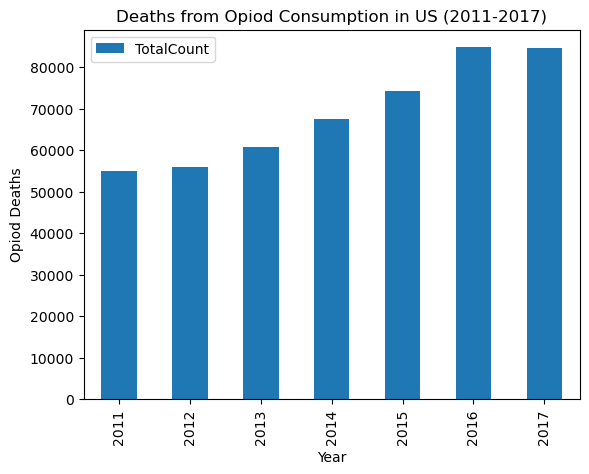

In [404]:

Y_axis = totalcountsum_df["TotalCount"]
totalcountsum_df.plot(kind="bar")
plt.title("Deaths from Opiod Consumption in US (2011-2017)")
plt.ylabel("Opiod Deaths")
plt.show()


In [303]:
cleaneddatamean = datadf.groupby(["Year"]).mean()["Income"]
cleaneddatamean_df = pd.DataFrame(cleaneddatamean)
cleaneddatamean_df

C:\Users\amitk\AppData\Local\Temp\ipykernel_7552\372816526.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cleaneddatamean = datadf.groupby(["Year"]).mean()["Income"]


,Income
Year,
2011,67388.720451
2012,67855.034690
2013,68289.154353
2014,69296.383197
2015,70039.953674
2016,72110.294977
2017,75087.961174


y = 4.27x + -229719.08
The r-squared is: 0.86


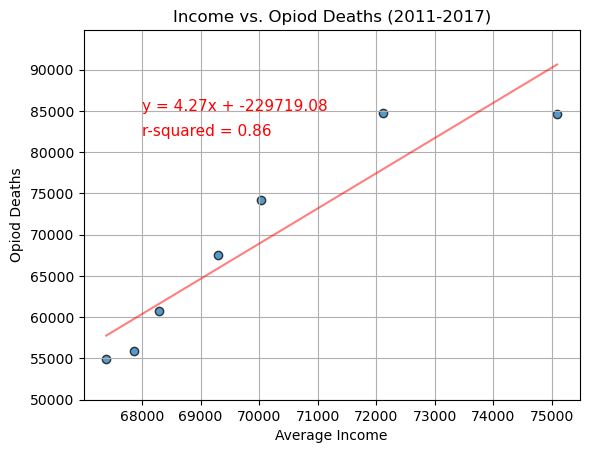

In [427]:
plt.scatter(cleaneddatamean_df["Income"], totalcountsum_df['TotalCount'], marker="o", edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title(f'Income vs. Opiod Deaths (2011-2017)')
plt.ylabel("Opiod Deaths")
plt.xlabel("Average Income")
plt.ylim(50000, max(totalcountsum_df['TotalCount'])+10000)
plt.grid(True)


x_axis = cleaneddatamean_df["Income"]
y_axis = totalcountsum_df['TotalCount']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
# y = mx + b
regress_values = x_axis * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_axis,regress_values, color='r', alpha=0.5)
print(line_equation)

# Calculate r-squared
r_squared = round(rvalue**2,2)
print(f"The r-squared is: {r_squared}")


# Add line Annotation and r-squared to the graph 
plt.annotate(line_equation,(68000,85000), fontsize=11, color="red")
plt.annotate(f'r-squared = {r_squared}', (68000,82000), fontsize=11, color="red")
plt.show()
plt.close()

In [459]:
cleaneddatadf2 = datadf.groupby(["Year","Type","EducationType"]).first()
cleaneddatadf2

State   County  Population  \
Year Type        EducationType                                                  
2011 Heroin      Bachelor Degree                 Alabama  Baldwin    186717.0   
                 Grad Degree                     Alabama  Baldwin    186717.0   
                 HS Grad                         Alabama  Baldwin    186717.0   
                 Less Than HS                    Alabama  Baldwin    186717.0   
                 Some College/Associates Degree  Alabama  Baldwin    186717.0   
...                                                  ...      ...         ...   
2017 Other Opiod Bachelor Degree                 Alabama  Baldwin    212628.0   
                 Grad Degree                     Alabama  Baldwin    212628.0   
                 HS Grad                         Alabama  Baldwin    212628.0   
                 Less Than HS                    Alabama  Baldwin    212628.0   
                 Some College/Associates Degree  Alabama  Baldwin    212628.0   

                                                 LandArea  CountByType  \
Year Type        EducationType                                           
2011 Heroin      Bachelor Degree                  1589.78         10.0   
                 Grad Degree                      1589.78         10.0   
                 HS Grad                          1589.78         10.0   
                 Less Than HS                     1589.78         10.0   
                 Some College/Associates Degree   1589.78         10.0   
...                                                   ...          ...   
2017 Other Opiod Bachelor Degree                  1589.78         11.0   
                 Grad Degree                      1589.78         11.0   
                 HS Grad                          1589.78         11.0   
                 Less Than HS                     1589.78         11.0   
                 Some College/Associates Degree   1589.78         11.0   

                                                 TotalCount  NonUSBorn  \
Year Type        EducationType                                           
2011 Heroin      Bachelor Degree                       10.0     5147.0   
                 Grad Degree                           10.0     5147.0   
                 HS Grad                               10.0     5147.0   
                 Less Than HS                          10.0     5147.0   
                 Some College/Associates Degree        10.0     5147.0   
...                                                     ...        ...   
2017 Other Opiod Bachelor Degree                       15.0     5703.0   
                 Grad Degree                           15.0     5703.0   
                 HS Grad                               15.0     5703.0   
                 Less Than HS                          15.0     5703.0   
                 Some College/Associates Degree        15.0     5703.0   

                                                 EducationCount CommuteType  \
Year Type        EducationType                                                
2011 Heroin      Bachelor Degree                        22946.0       Alone   
                 Grad Degree                            10923.0       Alone   
                 HS Grad                                36271.0       Alone   
                 Less Than HS                           15094.0       Alone   
                 Some College/Associates Degree         39216.0       Alone   
...                                                         ...         ...   
2017 Other Opiod Bachelor Degree                        29237.0       Alone   
                 Grad Degree                            14731.0       Alone   
                 HS Grad                                39771.0       Alone   
                 Less Than HS                           13997.0       Alone   
                 Some College/Associates Degree         45286.0       Alone   

                                           

In [469]:
cleaneddatadf3 = cleaneddatadf2.groupby(["Type" =="Heroine"]).count

TypeError: 'DataFrame' object is not callable